# Description des annotations

In [1]:
import pandas as pd

current_annotations_file = "../data/intermediate/annotations/2024-07-15-activeTigger-Personne.csv"

annotations_file = pd.read_csv(current_annotations_file, dtype = {'sentence_id':'int', 
'Personne':'str'}).set_index('sentence_id')

annotations_file.head(5)

Personne
sentence_id                                  
1220587      Personne responsable et autonome
1291195      Personne responsable et autonome
1360306      Personne responsable et autonome
580205       Personne responsable et autonome
700014       Personne responsable et autonome

In [2]:
base_shuffled = pd.read_pickle("../data/intermediate/big/base_shuffled.pkl")
base_shuffled.sentence_id = base_shuffled.sentence_id.apply(int)

base_shuffled.set_index('sentence_id', inplace= True)

base_shuffled.head(5)

sentence_text  \
sentence_id                                                      
770722       Avec l’accumulation de grandes quantités de do...   
930350       Le critère du consentement : le consentement p...   
1070205      Notons, en outre, que si l’on considérait que ...   
180058       Dans cette perspective, on concluera que légit...   
1301177      Qui fautil informer, quand et com ment ? Comme...   

                                                      sentence  personne  \
sentence_id                                                                
770722       Le principe de la noncommercialisation du corp...     False   
930350       Dans la mesure où le matériel biologique brut ...      True   
1070205      Or, le Comité estime pr écisément que la catég...      True   
180058       De fondation, en vertu même des principes qui ...      True   
1301177      Comment respecter le droit \nde la personne de...      True   

             humain  individu  \
sentence_id                     
770722         True     False   
930350        False     False   
1070205       False     False   
180058        False     False   
1301177       False     False   

                                                         Titre       Date  \
sentence_id                                                                 
770722       Problèmes éthiques posés par les collections d... 2003-03-20   
930350       Commercialisation des cellules souches humaine... 2006-06-22   
1070205      Avis sur les problèmes éthiques liés aux diagn... 2009-10-15   
180058       Etat des études conduites par le Comité concer... 1989-12-15   
1301177      Données massives et santé : Etat des lieux, pr... 2019-06-29   

                    president  \
sentence_id                     
770722         Sicard (00-08)   
930350         Sicard (00-08)   
1070205      Grimfeld (09-11)   
180058        Bernard (83-91)   
1301177      Delfraissy (16-)   

                                                  rapporteurs  \
sentence_id                                                     
770722       Hélène Gaumont-Prat,Nicole Questiaux,Gérard Orth   
930350                                  Monique Canto-Sperber   
1070205                Pierre Le Coz,Dominique Stoppa-Lyonnet   
180058                                                    NaN   
1301177                   Laure Coulombel,Pierre Delmas-Goyon   

                                                    membres_gt  \
sentence_id                                                      
770722       Nicole Baumann,Anne Cambon-Thomsen,Monique Can...   
930350       Anne Cambon-Thomsen,Hélène Gaumont-Prat,Chanta...   
1070205      Annick Alpérovitch,Joëlle Belaisch-Allart,Fréd...   
180058                                                     NaN   
1301177      Gilles Adda,Thomas Bourgeron,Jean-Marie Delaru...   

                               theme  saisine  divergence  CNPEN  \
sentence_id                                                        
770722                       Société    False         0.0    0.0   
930350             Don, consentement    False         0.0    0.0   
1070205                  Procréation    False         0.0    0.0   
180058       Génétique et Diagnostic    False         0.0    0.0   
1301177                      Société     True         0.0    0.0   

             tableaux et graphiques  nb_mots  number_sentences  nb_pages  \
sentence_id                                                                
770722                            1    22196               730        51   
930350                            0    22028               703        40   
1070205                           0    14877               520        28   
180058                            0     4177               142         8   
1301177                           0    44296              1373        94   

             sentence_index  num  
sentence_id                       
770722                  722   77  
930350         

In [3]:
annotations_file = annotations_file.join(base_shuffled[['sentence']], how = "left")

annotations_file

Personne  \
sentence_id                                     
1220587      Personne responsable et autonome   
1291195      Personne responsable et autonome   
1360306      Personne responsable et autonome   
580205       Personne responsable et autonome   
700014       Personne responsable et autonome   
...                                       ...   
1241006                                   NaN   
580367                    Personne à protéger   
920101                                    NaN   
820288                                    NaN   
1260444                                   NaN   

                                                      sentence  
sentence_id                                                     
1220587      Il importe donc de tenir compte de toutes les ...  
1291195      Le principe fondamental d’une garantie humaine...  
1360306      Ces personnes donnent un consentement qui relè...  
580205       Sur le plan éthique, cette évolution peut être...  
700014       C'est dans ce cadre que peut se\nposer la ques...  
...                                                        ...  
1241006      154 Article L 1133 -41 du code de la santé pub...  
580367       L'attitude\ninterventionniste est justifiée, s...  
920101       Accueillir des personnes vulnérables ne saurai...  
820288       c. Etat des lieux concernant la demande de rec...  
1260444      Les techniques d’AMP sont des traitements cont...  

[2000 rows x 2 columns]

In [4]:
annotations_file[["Personne","sentence"]].dropna().to_csv("../data/intermediate/annotations/personne_withSentence_1400annotations_2024-07-15_ActiveTigger.csv")

## Description des catégories en nombre et recodage

In [4]:
import pandas as pd

annotations = annotations_file.copy()

simplify_labels = False # a partir du dictionnaire ci dessous label_categories
take_sentence_with_context = False # choix entre juste la phrase et la phrase + précédante + suivante
resample = False # si on fusionne des catégories, on refait un sample pour ne pas avoir de catégories plus présentes que d'autres
cat_to_resample = ["Personne responsable et autonome",
"Personne relationnelle", "Personne à protéger"]
n_resample = 80 # a ajuster en fonction  de si resample et du nombre de catégorie fusionner (avec l'idée que chaque catégorie est initialement autant annoté)

if(take_sentence_with_context):
    text_var = "sentence_text"
else:
    text_var = "sentence"

# defining the label variable, with a possible recategorization before training
label_categories = {
    "Poubelle" : "Poubelle",
    "Humain comme empathie" : "Genre/espèce humaine",
    "Sentiment humain": "Genre/espèce humaine",
    "Genre/espèce humaine": "Genre/espèce humaine",
    "Corps humain":"Corps humain",
    "Matériel biologique": "Corps humain",
    "Individu": "Individu ou sujet",
    "Individu ou sujet" : "Individu ou sujet",
    "Agent responsable":"Personne",
    "Personne responsable et autonome" : "Personne",
    "Personne relationnelle": "Personne",
    "Personne à protéger":"Personne"
}

if resample:
    no_resample = annotations[~annotations['Personne'].isin(cat_to_resample)]

    resampled_70 = pd.concat([annotations[annotations['Personne'] == cat].sample(n_resample, 
    replace=True) for cat in cat_to_resample])

    # Combine the sampled dataframes
    annotations = pd.concat([no_resample, resampled_70])

    # Reset index
    annotations.reset_index(drop=True, inplace=True)

if(simplify_labels):
    annotations['label'] = annotations['Personne'].map(label_categories)

else:
    annotations['label'] = annotations['Personne']

# defining text variable    
annotations['text'] = annotations[text_var]


annotations_file.sample(5)

Personne  \
sentence_id                                     
40031                  Personne relationnelle   
600333                      Individu ou sujet   
1180200      Personne responsable et autonome   
1380011                                   NaN   
1240920      Personne responsable et autonome   

                                                      sentence  
sentence_id                                                     
40031        Ces renseignements portent sur la\npersonne en...  
600333       N° 41 : La Coopération dans le domaine de la r...  
1180200      Comité Consultatif National d’Éthique pour les...  
1380011      Dans sa conclusion, cet avis  soulevait une qu...  
1240920      Ce sont celles spécifiques aux \npratiques méd...

In [5]:
# filtering out not annotated (na) and some categories
original_categories_to_filter = ["Poubelle", "Sentiment humain"]
annotations = annotations.dropna()
annotations = annotations[~annotations["Personne"].isin(original_categories_to_filter)]
annotations.sample(5)

Personne  \
sentence_id                           
770051            Individu ou sujet   
1360394      Personne relationnelle   
810359         Genre/espèce humaine   
570051                 Corps humain   
1291274        Genre/espèce humaine   

                                                      sentence  \
sentence_id                                                      
770051       En effet, la réitération de\ncette procédure d...   
1360394      Les professionnels de santé doivent interroger...   
810359       L'homogénéisation des standards culturels dans...   
570051       Ces possibilités débouchent sur la connaissanc...   
1291274      Celuici ne devrait \nplus concerner seulement ...   

                              label  \
sentence_id                           
770051            Individu ou sujet   
1360394      Personne relationnelle   
810359         Genre/espèce humaine   
570051                 Corps humain   
1291274        Genre/espèce humaine   

                                                          text  
sentence_id                                                     
770051       En effet, la réitération de\ncette procédure d...  
1360394      Les professionnels de santé doivent interroger...  
810359       L'homogénéisation des standards culturels dans...  
570051       Ces possibilités débouchent sur la connaissanc...  
1291274      Celuici ne devrait \nplus concerner seulement ...

In [6]:
annotations["Personne"].value_counts()

Personne
Individu ou sujet                   253
Corps humain                        241
Personne relationnelle              225
Personne à protéger                 213
Genre/espèce humaine                209
Personne responsable et autonome    202
Name: count, dtype: int64

In [7]:
annotations["label"].value_counts()

label
Individu ou sujet                   253
Corps humain                        241
Personne relationnelle              225
Personne à protéger                 213
Genre/espèce humaine                209
Personne responsable et autonome    202
Name: count, dtype: int64

## Description lexicographique

In [8]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the French language model from spaCy
nlp = spacy.load("fr_core_news_sm")

# Function to lemmatize text
def lemmatize_text(text):
    custom_stop_words = ["e"]
    doc = nlp(text)
    lemmatized = " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token in custom_stop_words])
    return lemmatized

# Apply lemmatization to the 'text' column
annotations['lemmatized_text'] = annotations['text'].apply(lemmatize_text)

In [9]:
import re
def filter_words(text):

    # Compile regex pattern with word boundaries
    pattern = re.compile(r'\b(?:' + '|'.join(words_to_filter) + r')\b', flags=re.IGNORECASE)
    return pattern.sub('', text)

In [10]:
words_to_filter = ['l','e','ceue']

annotations["lemmatized_text"]=annotations["lemmatized_text"].apply(filter_words)

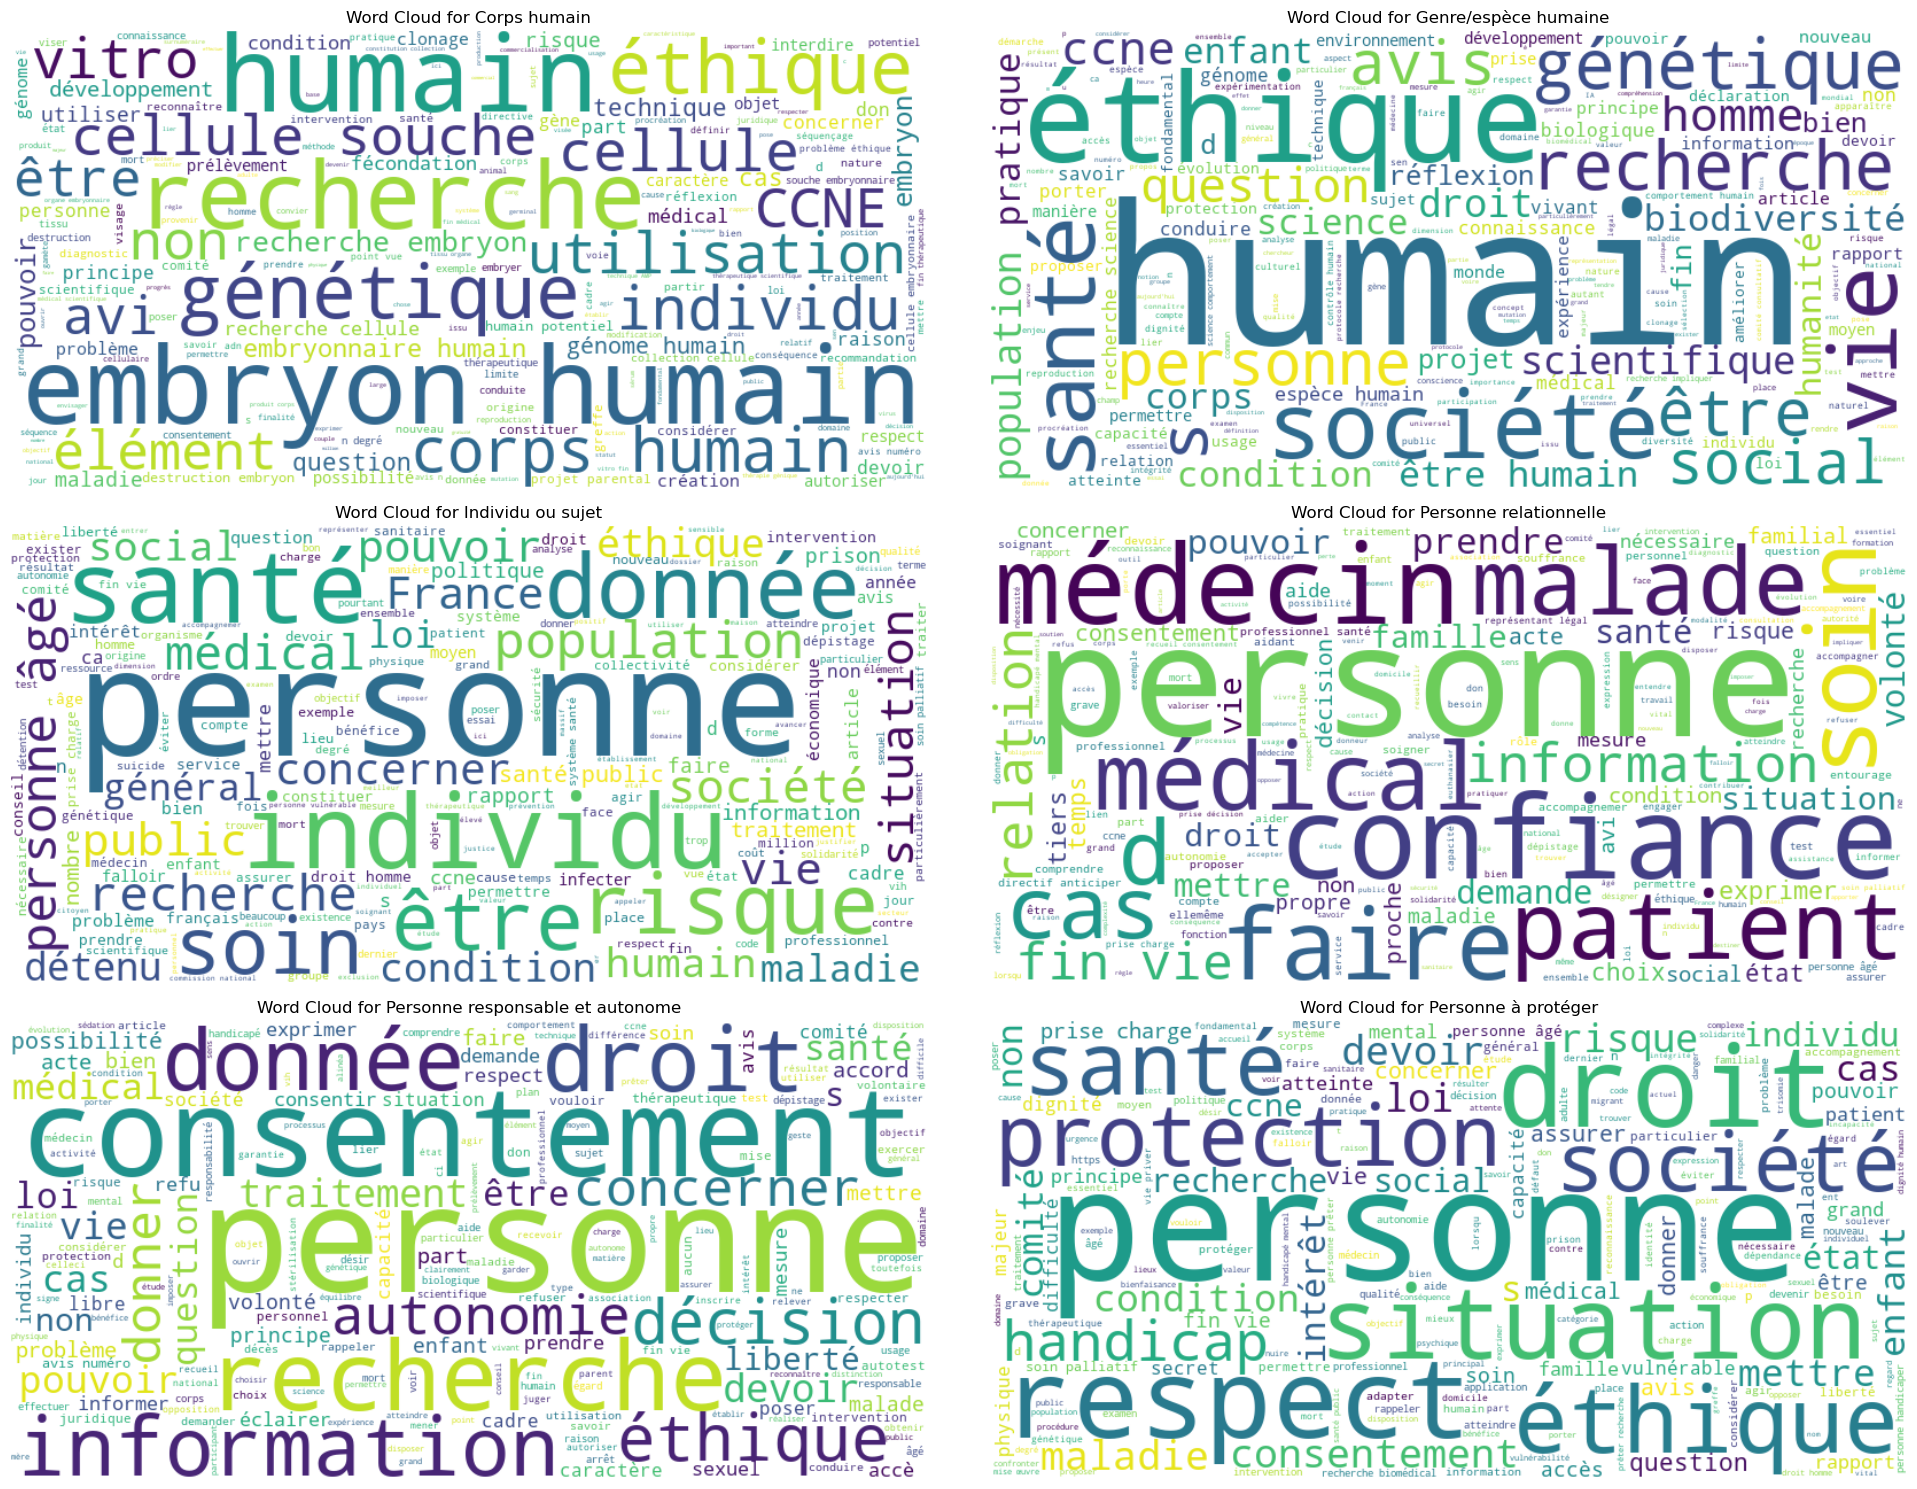

In [11]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Determine the number of categories
num_categories = annotations['Personne'].nunique()

# Setup plot grid (2 columns, 3 rows max)
cols = 2
rows = round(num_categories/cols)
# Create the figure with a gridspec
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(rows, cols, figure=fig)

# Counter for subplot index
subplot_index = 0

for category, group in annotations.groupby('Personne'):
    combined_text = " ".join(group['lemmatized_text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(combined_text)
    
    # Calculate row, col index for the current subplot
    row = subplot_index // cols
    col = subplot_index % cols
    
    ax = fig.add_subplot(gs[row, col])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {category}')
    ax.axis('off')
    
    subplot_index += 1

plt.tight_layout()
plt.show()

In [12]:
words_to_filter = ['recherche','humain','médical','médecin','personne','soin','éthique','santé','droit','l','e','ceue']

annotations["lemmatized_text_without_big_words"]=annotations["lemmatized_text"].apply(filter_words)


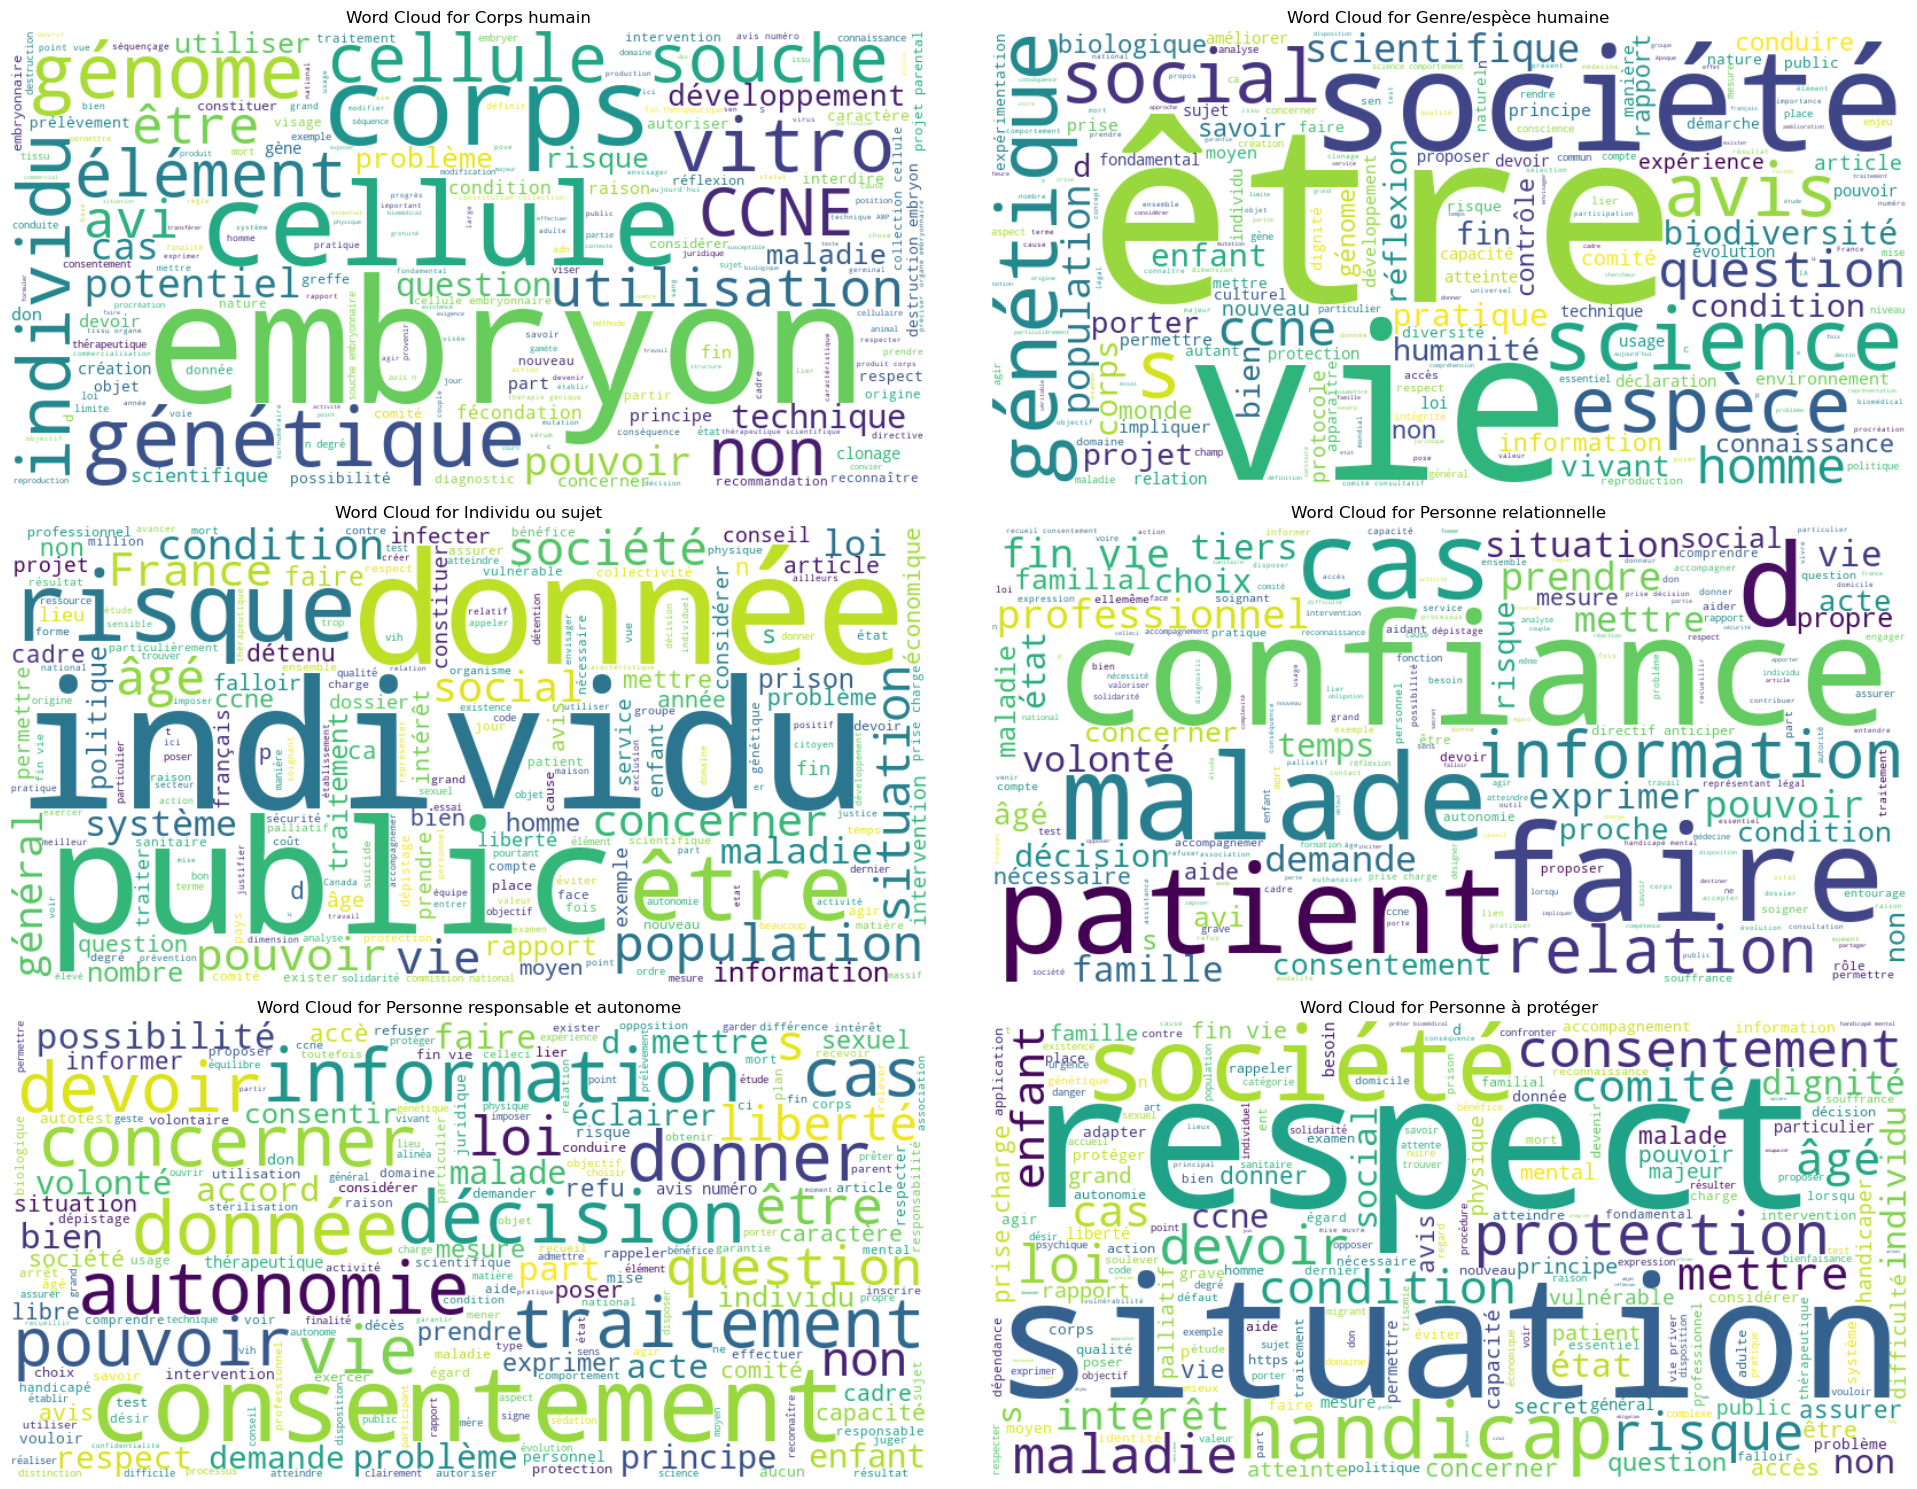

In [13]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Determine the number of categories
num_categories = annotations['Personne'].nunique()

# Setup plot grid (2 columns, 3 rows max)
cols = 2
rows = round(num_categories/cols)
# Create the figure with a gridspec
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(rows, cols, figure=fig)

# Counter for subplot index
subplot_index = 0

for category, group in annotations.groupby('Personne'):
    combined_text = " ".join(group['lemmatized_text_without_big_words'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(combined_text)
    
    # Calculate row, col index for the current subplot
    row = subplot_index // cols
    col = subplot_index % cols
    
    ax = fig.add_subplot(gs[row, col])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {category}')
    ax.axis('off')
    
    subplot_index += 1

plt.tight_layout()
plt.show()

# Compte nombre de token GPT

In [ ]:
import numpy  as np
from transformers import GPT2Tokenizer

# Load the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Function to count the number of tokens in a sentence
def count_tokens(sentence):
    tokens = tokenizer.tokenize(sentence)
    return len(tokens)

# Apply the function to the 'sentence' column and create a new column 'num_tokens'
base_shuffled['num_tokens'] = base_shuffled['sentence'].apply(count_tokens)

annotations_file['num_tokens'] = annotations_file['sentence'].apply(count_tokens)

# Display the dataframe with the new column
print("nombre de token. sum(toutes les phrases) :", np.sum(base_shuffled.num_tokens),"sum(annotation)",np.sum(annotations_file.num_tokens))


nombre de token. sum(toutes les phrases) : 773301 sum(annotation) 140168
